In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import linregress
plt.rcParams['text.usetex'] = True

We study the following heat equation
$$\partial_t u(t,x) = \nu \partial_{xx} u(t,x),$$
with $u(t,0) = u(t,1) = 0$ and $u(0, x) = u_0(x)$.

In [2]:
xL = 0
xR = 1
u0 = lambda x : np.maximum(1/4 - (x-1/2)**2,0)

In [3]:
def ftcs(ν, dt, Nx, T):
    """
        ν: coefficient in heat equation
        dt: time step size
        Nx: number of spatial grid points
        T: total time
    """
    dx = (xR-xL)/(Nx)
    x = np.linspace(xL, xR, Nx+1)
    u = np.zeros((int(T/dt)+1, Nx+1))
    u[0,:] = u0(x)

    for n in range(int(T/dt)):
        u[n+1, :] = u[n, :].copy()
        
        # Interior points
        for i in range(1, Nx):
            u[n+1, i] = u[n, i] + ν*dt/dx**2 * (u[n, i+1] - 2*u[n, i] + u[n, i-1])
            
    return u

In [4]:
T = 1/2
ν = 1.0  # Thermal diffusivity

In [5]:
def visualize(γ):
    # We fix the scaling of dt with respect to dx^2 for simplicity
    
    Nt_predict = lambda T, dx, ν : int(np.ceil(T/(γ * dx**2/ν)))

    # we choose Nx large enough to get "exact" values
    Nx = 200; dx = (xR-xL)/Nx
    Nt = Nt_predict(T,dx,ν); dt = T/Nt
    x_exact = np.linspace(xL, xR, Nx+1)
    u_exact = ftcs(ν, dt, Nx, T)

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(x_exact, u_exact[-1,:])

    # we choose Nx relatively smaller and compare it with exact values
    Nx_list = [5, 10, 20, 25]
    err_list = np.zeros(len(Nx_list))
    for Nx_idx in range(len(Nx_list)):
        Nx = Nx_list[Nx_idx]; dx = (xR-xL)/Nx
        Nt = Nt_predict(T,dx,ν); dt = T/Nt
        x = np.linspace(xL, xR, Nx+1)
        u_approx = ftcs(ν, dt, Nx, T)

        plt.plot(x, u_approx[-1,:], 'x-', label=r"$N_x=${:d}".format(Nx))

        # we use L^\infty norm herein
        err_list[Nx_idx] = np.max(np.abs(np.interp(x, x_exact, u_exact[-1,:]) - u_approx[-1,:]))

    plt.xlabel('$x$', fontsize=14)
    plt.title(r'$u({:.2f},x)$'.format(T), fontsize=14)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.plot(Nx_list, err_list, 'kx-')
    plt.xlabel(r'$N_x$', fontsize=14)
    plt.title(r'$L^\infty$ error', fontsize=14)
    plt.yscale('log')
    plt.xscale('log')
    plt.tight_layout()

    # we print the slope herein after linear regression
    slope, _, _, _, _ = linregress(np.log(Nx_list), np.log(err_list))
    print("The convergence rate is N^{:.2f}".format(slope))

#### Case (I): We chooose $\Delta t = \gamma (\Delta x)^2/\nu$ where $\gamma = 1/3$

The convergence rate is N^-1.95


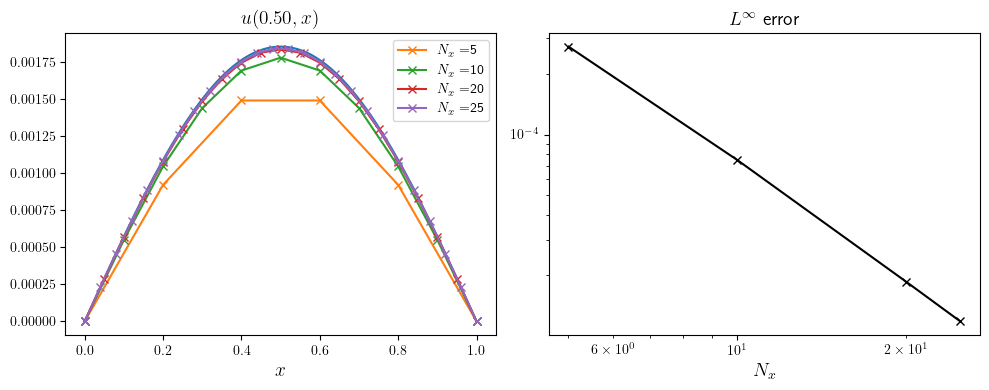

In [6]:
visualize(1/3)

#### Case (II) We chooose $\Delta t = \gamma (\Delta x)^2/\nu$ where $\gamma = 1/4$

The convergence rate is N^-1.98


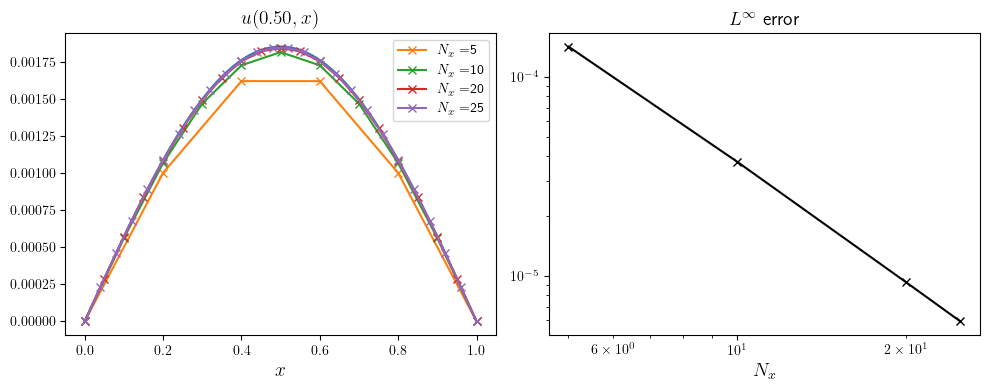

In [7]:
visualize(1/4)

#### Case (III) We chooose $\Delta t = \gamma (\Delta x)^2/\nu$ where $\gamma = 1/6$

The convergence rate is N^-3.99


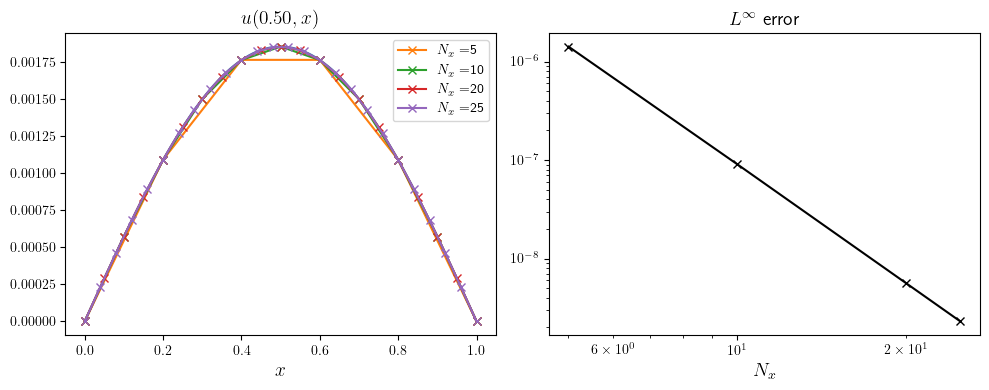

In [8]:
visualize(1/6)

#### Case (IV) We chooose $\Delta t = \gamma (\Delta x)^2/\nu$ where $\gamma = 1/8$

The convergence rate is N^-2.01


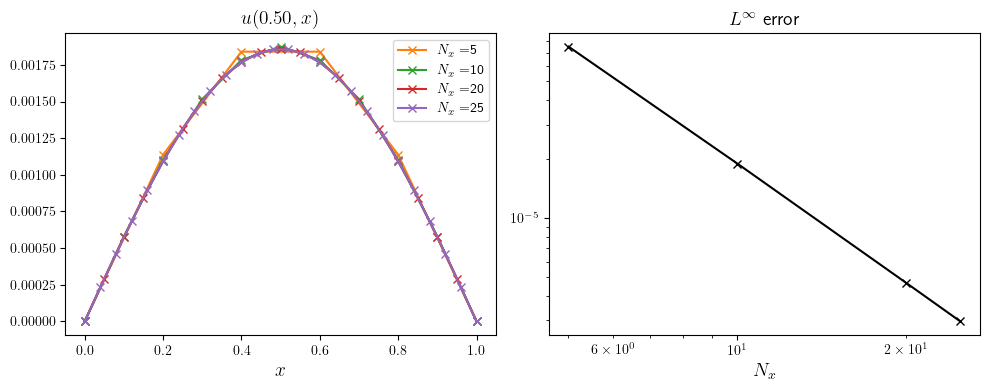

In [9]:
visualize(1/8)